
# 🧭 Pandas Data Visualization Tutorial
This tutorial demonstrates how to visualize data using **Pandas**, **Matplotlib**, and **Seaborn** — with the **Auto MPG dataset** from the Bokeh module.

We’ll explore:
- Basic dataset exploration
- Built-in Pandas plotting
- Matplotlib visualizations
- Seaborn advanced plots


In [3]:
!pip install bokeh_sampledata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 16.9 MB/s eta 0:00:00


In [4]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.sampledata.autompg import autompg as df

# Display first few rows
df.head()


,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino



## 🔍 Step 1: Explore the DataFrame
Before visualizing, let's understand the data structure.


In [4]:

print("DataFrame Info:")
df.info()

print("\nSummary Statistics:")
df.describe()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
 8   name    392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB

Summary Statistics:


,mpg,cyl,displ,hp,weight,accel,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000



## 📊 Step 2: Pandas Built-in Visualization
Pandas integrates directly with Matplotlib for quick visualizations.


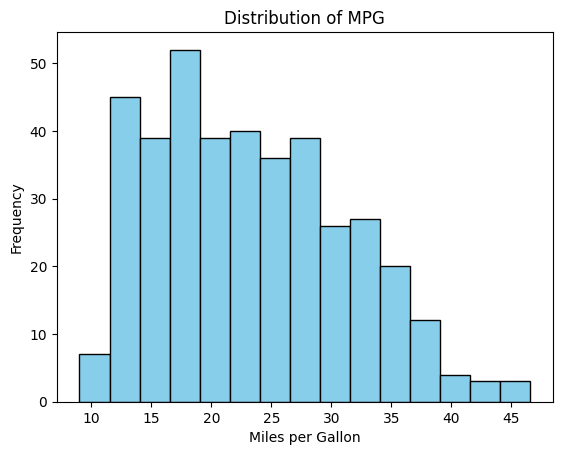

In [8]:
# Histogram of MPG
df['mpg'].plot(kind='hist', bins=15, color='skyblue', edgecolor='black', title='Distribution of MPG')
plt.xlabel('Miles per Gallon')
plt.xticks(range(10, 50, 5))   # show labels at 10, 15, 20, …, 45
plt.show()


📊 Understanding Histograms

A histogram is one of the most common plots used in data analysis to visualize the distribution of a single numerical variable.
It divides the data into intervals (called bins) and shows how many data points fall into each bin.
The height of each bar represents the frequency (or count) of observations in that range.


In [13]:
import numpy as np
np.linspace(df['mpg'].min(), df['mpg'].max(), 16)

array([ 9.        , 11.50666667, 14.01333333, 16.52      , 19.02666667,
       21.53333333, 24.04      , 26.54666667, 29.05333333, 31.56      ,
       34.06666667, 36.57333333, 39.08      , 41.58666667, 44.09333333,
       46.6       ])

Each bin covers one range, such as:

Bin 1: 9.0 ≤ mpg < 11.5067

Bin 2: 11.5067 ≤ mpg < 14.01



In [14]:
counts, bin_edges = np.histogram(df['mpg'], bins=15)
counts
# Each number corresponds to the height of a bar.

array([ 7, 45, 39, 52, 39, 40, 36, 39, 26, 27, 20, 12,  4,  3,  3])

Plotting the bars

Then Matplotlib draws rectangles for each bin:

1. X-position: starts and ends at the bin edges.
2. Width: the distance between consecutive edges.
3. Height: the count of data points in that bin (from counts).


So visually:

1. Each bar = one bin range

2. Bar height = number of cars in that bin

3. Bar width = range width (≈2.47 MPG units)

In [15]:
import numpy as np

counts, bin_edges = np.histogram(df['mpg'], bins=15)
for i in range(len(counts)):
    print(f"Bin {i+1}: Range {bin_edges[i]:.2f}–{bin_edges[i+1]:.2f}, Count = {counts[i]}")


Bin 1: Range 9.00–11.51, Count = 7
Bin 2: Range 11.51–14.01, Count = 45
Bin 3: Range 14.01–16.52, Count = 39
Bin 4: Range 16.52–19.03, Count = 52
Bin 5: Range 19.03–21.53, Count = 39
Bin 6: Range 21.53–24.04, Count = 40
Bin 7: Range 24.04–26.55, Count = 36
Bin 8: Range 26.55–29.05, Count = 39
Bin 9: Range 29.05–31.56, Count = 26
Bin 10: Range 31.56–34.07, Count = 27
Bin 11: Range 34.07–36.57, Count = 20
Bin 12: Range 36.57–39.08, Count = 12
Bin 13: Range 39.08–41.59, Count = 4
Bin 14: Range 41.59–44.09, Count = 3
Bin 15: Range 44.09–46.60, Count = 3


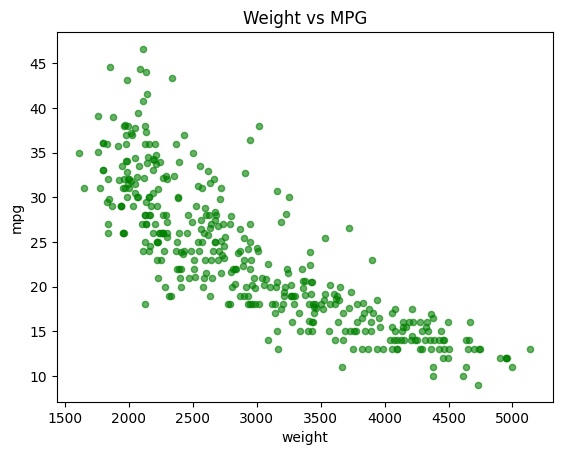

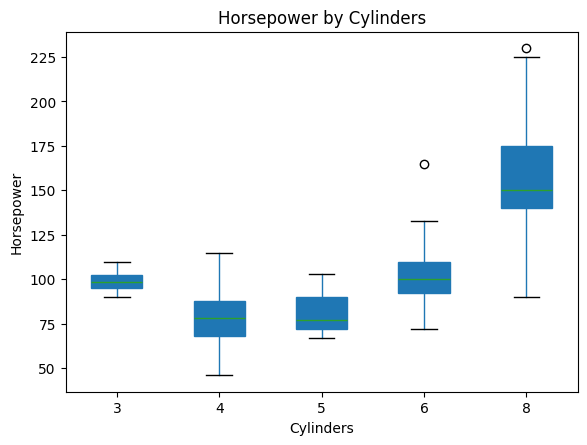

In [9]:
# Scatter plot between weight and mpg
df.plot(kind='scatter', x='weight', y='mpg', alpha=0.6, color='green', title='Weight vs MPG')
plt.show()

# Boxplot for horsepower grouped by cylinders
df.boxplot(column='hp', by='cyl', grid=False, patch_artist=True)
plt.title('Horsepower by Cylinders')
plt.suptitle('')
plt.xlabel('Cylinders')
plt.ylabel('Horsepower')
plt.show()


## Below is a comprehensive summary of the most popular and useful values for kind:

Basic Plot Types

| **Kind** | **Description**                            | **Example**                                    |
| -------- | ------------------------------------------ | ---------------------------------------------- |
| `'line'` | Default — line plot (good for time series) | `df.plot(kind='line')`                         |
| `'bar'`  | Vertical bar plot                          | `df.plot(kind='bar', x='origin', y='mpg')`     |
| `'barh'` | Horizontal bar plot                        | `df.plot(kind='barh', x='origin', y='mpg')`    |
| `'hist'` | Histogram — distribution of one variable   | `df['mpg'].plot(kind='hist', bins=15)`         |
| `'box'`  | Boxplot — statistical summary              | `df.plot(kind='box')`                          |
| `'kde'`  | Kernel Density Estimate (smooth curve)     | `df['mpg'].plot(kind='kde')`                   |
| `'area'` | Filled area plot                           | `df.plot(kind='area')`                         |
| `'pie'`  | Pie chart (usually for a Series)           | `df['origin'].value_counts().plot(kind='pie')` |

Scatter & Relationship Plots

| **Kind**    | **Description**                              | **Example**                                                |
| ----------- | -------------------------------------------- | ---------------------------------------------------------- |
| `'scatter'` | 2D scatter plot                              | `df.plot(kind='scatter', x='weight', y='mpg')`             |
| `'hexbin'`  | Hexagonal binning plot — good for dense data | `df.plot(kind='hexbin', x='weight', y='mpg', gridsize=25)` |

Other Less Common (but Useful) Plot Types
| **Kind**                    | **Description**           | **Example**                                       |
| --------------------------- | ------------------------- | ------------------------------------------------- |
| `'density'`                 | Alias for `'kde'`         | `df['mpg'].plot(kind='density')`                  |
| `'hist'`                    | Histogram, same as before | `df.plot(kind='hist')`                            |
| `'bar'` with `stacked=True` | Stacked bar plot          | `df[['mpg','hp']].plot(kind='bar', stacked=True)` |




## 🎨 Step 3: Matplotlib Visualization
Matplotlib allows more customization and control over style.


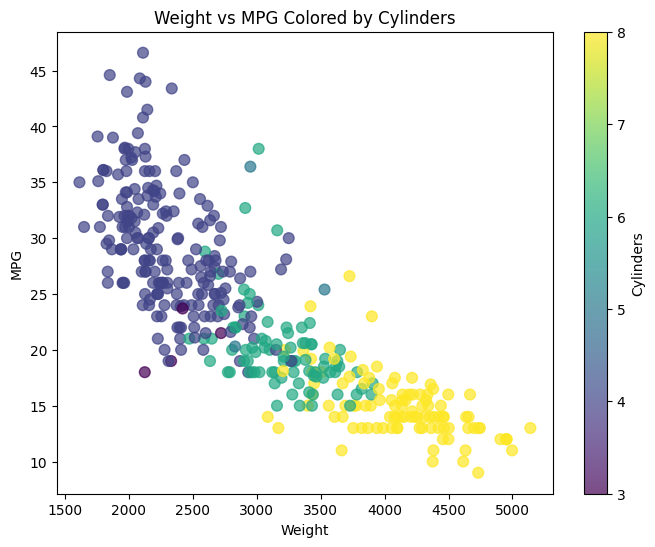

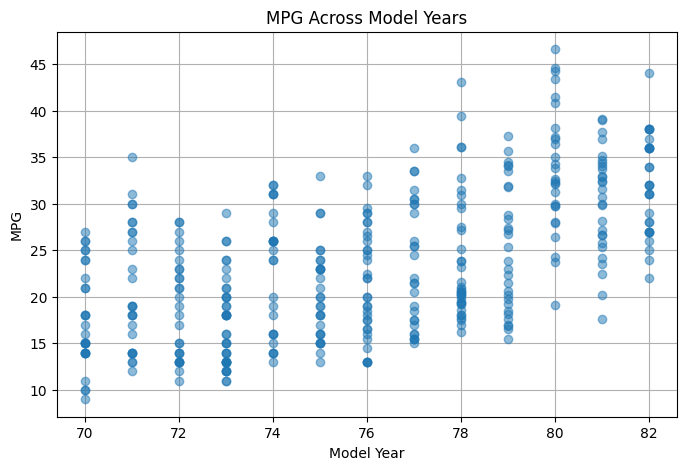

In [6]:

plt.figure(figsize=(8,6))
plt.scatter(df['weight'], df['mpg'], c=df['cyl'], cmap='viridis', s=60, alpha=0.7)
plt.title('Weight vs MPG Colored by Cylinders')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.colorbar(label='Cylinders')
plt.show()

plt.figure(figsize=(8,5))
plt.plot(df['yr'], df['mpg'], 'o', alpha=0.5)
plt.title('MPG Across Model Years')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.grid(True)
plt.show()



## 🌈 Step 4: Seaborn Visualization
Seaborn provides a higher-level interface and beautiful defaults for statistical plots.


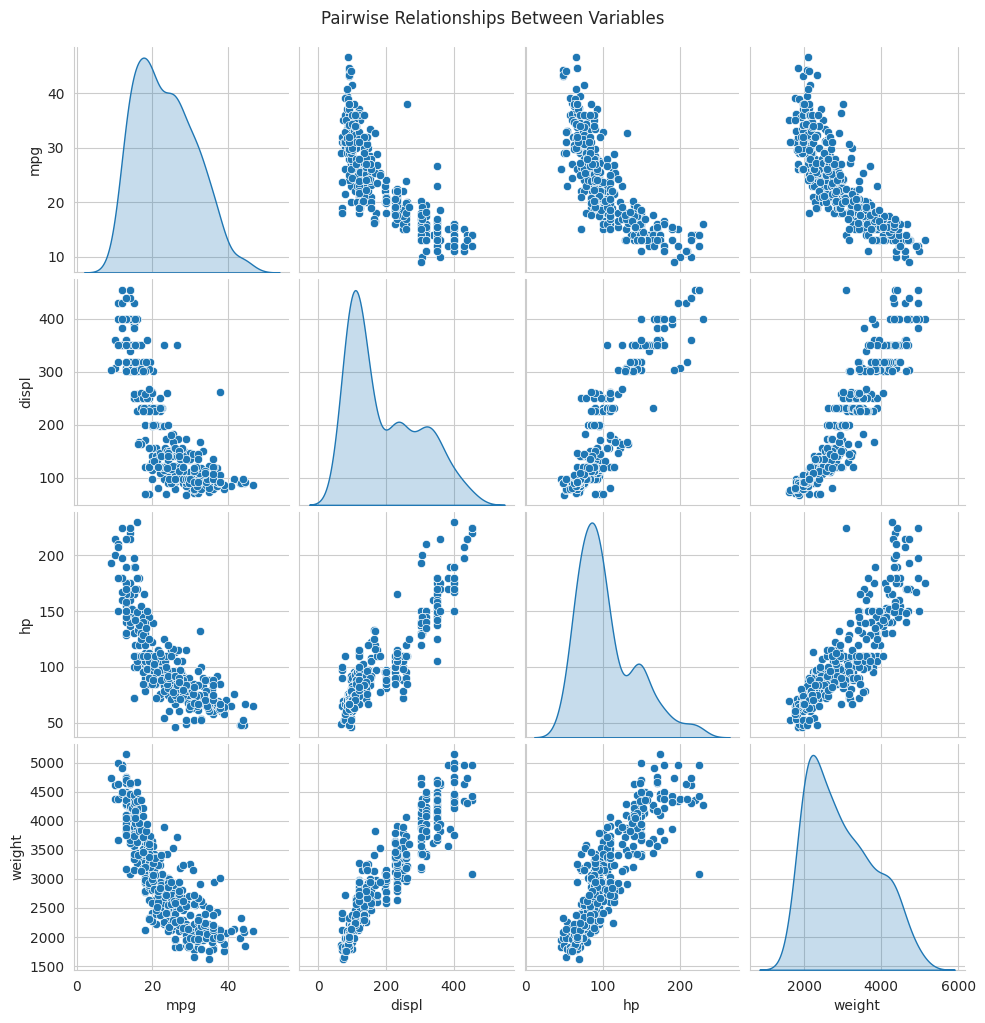

/tmp/ipython-input-3951766918.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cyl', y='mpg', palette='Set2')


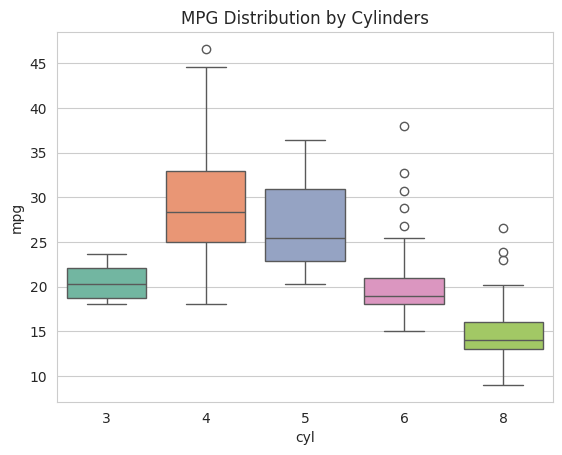

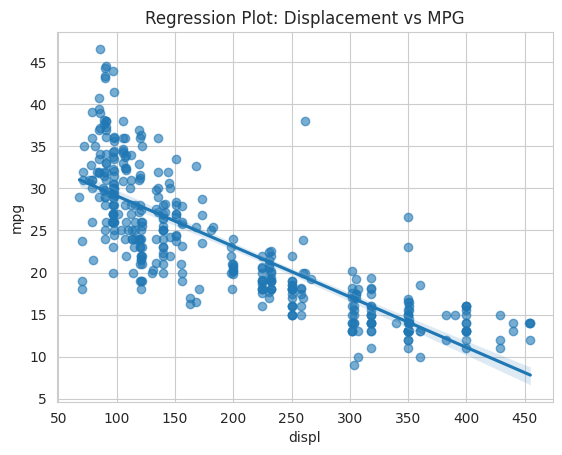

In [7]:

sns.set_style('whitegrid')

# Pairplot of key variables
sns.pairplot(df[['mpg', 'displ', 'hp', 'weight']], diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.show()

# Boxplot for MPG by Cylinders
sns.boxplot(data=df, x='cyl', y='mpg', palette='Set2')
plt.title('MPG Distribution by Cylinders')
plt.show()

# Regression plot for Displacement vs MPG
sns.regplot(data=df, x='displ', y='mpg', scatter_kws={'alpha':0.6})
plt.title('Regression Plot: Displacement vs MPG')
plt.show()


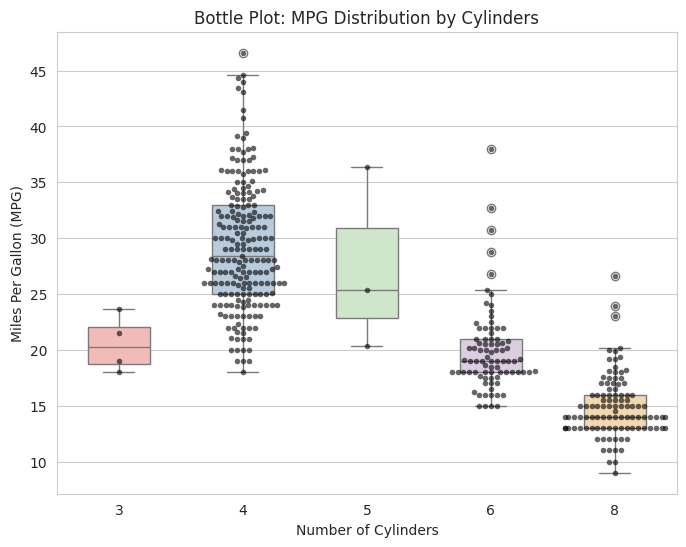

In [9]:
# ------------------------------------------------------
# 6️⃣ Bottle Plot (Boxplot + Swarmplot Overlay)
# ------------------------------------------------------
plt.figure(figsize=(8, 6))

# Define hue explicitly to avoid the warning
sns.boxplot(data=df, x='cyl', y='mpg', hue='cyl', palette='Pastel1', dodge=False, width=0.5, legend=False)
sns.swarmplot(data=df, x='cyl', y='mpg', color='black', alpha=0.6, size=4)

plt.title('Bottle Plot: MPG Distribution by Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend([], [], frameon=False)  # remove empty legend
plt.show()



✅ Explanation:

hue='cyl' tells Seaborn to apply the palette to that variable explicitly (removing the deprecation warning).

dodge=False ensures all boxes stay aligned vertically (not split).

The swarmplot still shows individual samples for better visualization of distribution.


## ✅ Step 5: Summary
- Heavier cars tend to have **lower MPG**.

- Cars with more cylinders consume **more fuel**.

- **Seaborn** is great for multi-variable visualizations.

- **Pandas** is perfect for quick data inspection.

- **Matplotlib** allows detailed control and custom styling.
